In [17]:
%matplotlib inline

In [18]:
def cascade_function(N): #recursive function that generates all possible cascades
    cascade_list = []
    cascade_list.append((N, )) #add first tuple to our list
    for i in range(1, N):
        for j in cascade_function(N - i): #we will recursively build our list of tuples
            cascade_list.append((i, ) + j) #we concat our new tuple and append it to the list
    return cascade_list

In [19]:
cascade_function(4) #just a simple test

[(4,), (1, 3), (1, 1, 2), (1, 1, 1, 1), (1, 2, 1), (2, 2), (2, 1, 1), (3, 1)]

In [20]:
def probabilities(N): #we want to figure out the probability of each cascade in the second scenario, aka each cascade had an equal chance of happening
    probs = [] #list of probabilities for every posible jump
    l = 0 #number of jumps across all cascades
    for entry in cascade_function(N):    
        l += len(entry)
    #print(l)
    for n in range(1, N+1): 
        x = 0
        for entry in cascade_function(N):    
            x += entry.count(n) #we count the number of times a jump appeared in all possible cascades
        #print(x)
        #print("Probability for", n, ':', x/l)
        probs.append(x/l) #divide our specific jump with all jumps
    return probs #return the list

In [21]:
probabilities(7)

256
Probability for 1 : 0.5625
Probability for 2 : 0.25
Probability for 3 : 0.109375
Probability for 4 : 0.046875
Probability for 5 : 0.01953125
Probability for 6 : 0.0078125
Probability for 7 : 0.00390625


[0.5625, 0.25, 0.109375, 0.046875, 0.01953125, 0.0078125, 0.00390625]

In [22]:
N = 7 #I chose 7 because it makes it easy to analyse the results without being overwhelming and still large enough to generate some data
E = [i**2 for i in range(1, N + 1)] #for now im just gonna make a simple energy list, i chose not to go with a simple 1, 2, 3... because this way there is some actual variance in energy of generated photons

In [23]:
def energy_fun(N, E):
    #kad su vjerovatnosti svih kaskada jednake mozemo jednostavno izracunati energetsku razinu svake kaskade i izvuci srednju vrijednost
    #to je ujedno energetska vrijednost svakog prijelaza, ujedno mozemo izvuci prosjecnu energiju fotona u tom slucaju
    a = cascade_function(N)
    energy_sum = 0
    l = 0
    for entry in cascade_function(N):    
        l += len(entry)
    for entry in a:
        for part in entry:
            energy_sum += E[part-1]
    return energy_sum/len(a), energy_sum/l

In [24]:
energy_fun(N, E)

(17.03125, 4.2578125)

In [35]:
def energy_fun2(N, E):
    #naci probablinost odredjene kaskade nije trivijalno, u prvom koraku svaki moguci skok ima 1/N probabilnost, u drugom imamo N-(rezulat) mogucnosti itd.
    a = cascade_function(N)
    cascade_probabilities = []
    for i in a:
        probability_of_cascade = 1
        n = N
        energy_level = 0
        for x in range(0, len(i)):
            if n > 0: 
                probability_of_cascade *= 1/n
                n-=i[x]
            energy_level += E[i[x]-1]
        cascade_probabilities.append(probability_of_cascade) #now we have the probability of each cascade if each energy change is equally likely
        #now we want to calculate the energy level for each and multiply it by their probability
        #at this point my knowledge of statistics fails me and I run out of time to figure out how to calculate the average number of photons and the average energy of a foton, so i wrote a simple simulation to calculate it instead

In [26]:
import random
import matplotlib.pyplot as plt

In [27]:
def sim_func(N, E):
#just generate our cascade
    l = 0
    np = []
    e = 0
    for i in range(1000000):  #make a milion cascades and sum up all their jumps
        x = []
        n = N
        ef = 0
        while n > 0:
            a = random.randrange(1, N+1)
            n -= a
            x.append(a)
            e += E[a-1]
            ef += E[a-1]
        l += len(x)
        ep = (len(x), ef)
        np.append(ep)
    np = sorted(np, key=lambda tup: tup[0]) #sort list by lenght of cascade
    X, Y = map(list, zip(*np)) #on my pc all of this runs pretty fast (under a minute)
    plt.plot(X, Y)
    return l/1000000, e/1000000 #viola easy averages

(2.228602, 44.546282)

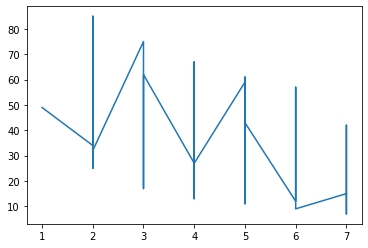

In [28]:
sim_func(N, E)